In [556]:
import numpy as np, pandas as pd, polars as pl
from sklearn.model_selection import KFold
from sklearn import preprocessing as skp
from sklearn.decomposition import PCA 

import xgboost as xgb
from sklearn.metrics import root_mean_squared_error as rmse

In [557]:
train = pd.read_csv('train.csv', index_col = 'id')
test = pd.read_csv('test.csv', index_col = 'id')

In [558]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


In [559]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 250000 non-null  object 
 1   Episode_Title                250000 non-null  object 
 2   Episode_Length_minutes       221264 non-null  float64
 3   Genre                        250000 non-null  object 
 4   Host_Popularity_percentage   250000 non-null  float64
 5   Publication_Day              250000 non-null  object 
 6   Publication_Time             250000 non-null  object 
 7   Guest_Popularity_percentage  201168 non-null  float64
 8   Number_of_Ads                250000 non-null  float64
 9   Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 21.0+ MB


In [560]:
categorical_map = {
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6, # Day

        'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3,                                            # Time

        'Negative': 0, 'Neutral': 1, 'Positive': 2,                                                        # Sentiment

        'True Crime': 0, 'Comedy': 1, 'Education': 2, 'Technology': 3, 'Health': 4, 'News': 5, 'Music': 6, # Genre
        'Sports': 7, 'Business': 8, 'Lifestyle': 9
        }

categories = ['Genre', 'Episode_Title', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

In [561]:
train.drop('Podcast_Name', inplace=True, axis=1)
test.drop('Podcast_Name', inplace=True, axis=1)

In [562]:
train['Episode_Title'] = train['Episode_Title'].str[8:]

In [563]:
train = train.replace(categorical_map).fillna(0)

In [564]:
x = train.drop('Listening_Time_minutes', axis=1)
y = train['Listening_Time_minutes']

In [565]:
poly = skp.PolynomialFeatures(interaction_only=True, include_bias=False)
x_poly = poly.fit_transform(x)

In [566]:
cols = poly.get_feature_names_out(x.columns)
x = pd.DataFrame(x_poly, columns=cols)

In [567]:
x = x.iloc[:,:23]

In [568]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 23 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Episode_Title                                       750000 non-null  float64
 1   Episode_Length_minutes                              750000 non-null  float64
 2   Genre                                               750000 non-null  float64
 3   Host_Popularity_percentage                          750000 non-null  float64
 4   Publication_Day                                     750000 non-null  float64
 5   Publication_Time                                    750000 non-null  float64
 6   Guest_Popularity_percentage                         750000 non-null  float64
 7   Number_of_Ads                                       750000 non-null  float64
 8   Episode_Sentiment                                   750000 non-n

In [569]:
mm_scaler = skp.MinMaxScaler()
x_s = pd.DataFrame(mm_scaler.fit_transform(x), columns=x.columns, index=x.index)

In [570]:
for c in categories: x_s[c] = x_s[c].astype('category')

In [ ]:
kf = KFold(3, shuffle=True, random_state=55)

[0]	validation_0-rmse:21.27102
[1]	validation_0-rmse:17.66119
[2]	validation_0-rmse:15.57047
[3]	validation_0-rmse:14.41925
[4]	validation_0-rmse:13.80609
[5]	validation_0-rmse:13.48656
[6]	validation_0-rmse:13.31957
[7]	validation_0-rmse:13.23170
[8]	validation_0-rmse:13.18033
[9]	validation_0-rmse:13.14867
[10]	validation_0-rmse:13.12965
[11]	validation_0-rmse:13.11703
[12]	validation_0-rmse:13.10972
[13]	validation_0-rmse:13.10106
[14]	validation_0-rmse:13.09595
[15]	validation_0-rmse:13.09034
[16]	validation_0-rmse:13.08392
[17]	validation_0-rmse:13.08185
[18]	validation_0-rmse:13.07824
[19]	validation_0-rmse:13.07932
[20]	validation_0-rmse:13.07735
[21]	validation_0-rmse:13.07653
[22]	validation_0-rmse:13.07713
[23]	validation_0-rmse:13.07493
[24]	validation_0-rmse:13.07575
[25]	validation_0-rmse:13.07493
[26]	validation_0-rmse:13.07268
[27]	validation_0-rmse:13.06958
[28]	validation_0-rmse:13.06918
[29]	validation_0-rmse:13.06645
[30]	validation_0-rmse:13.06561
[31]	validation_0-

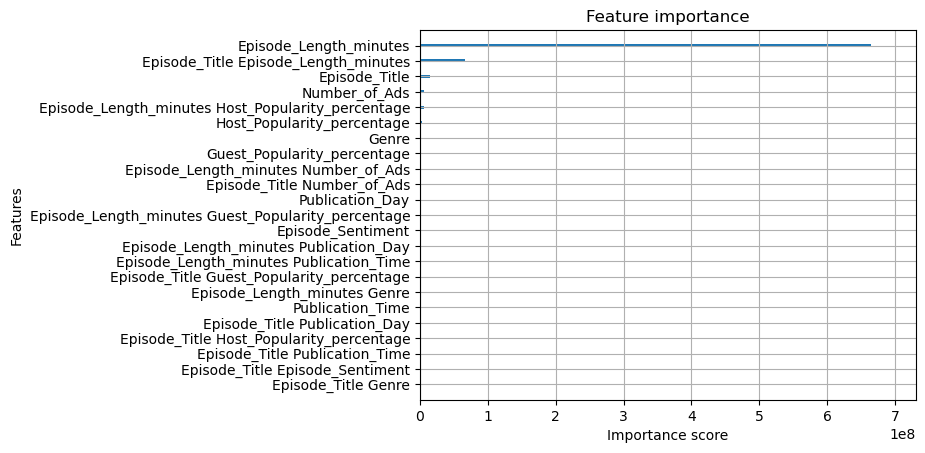

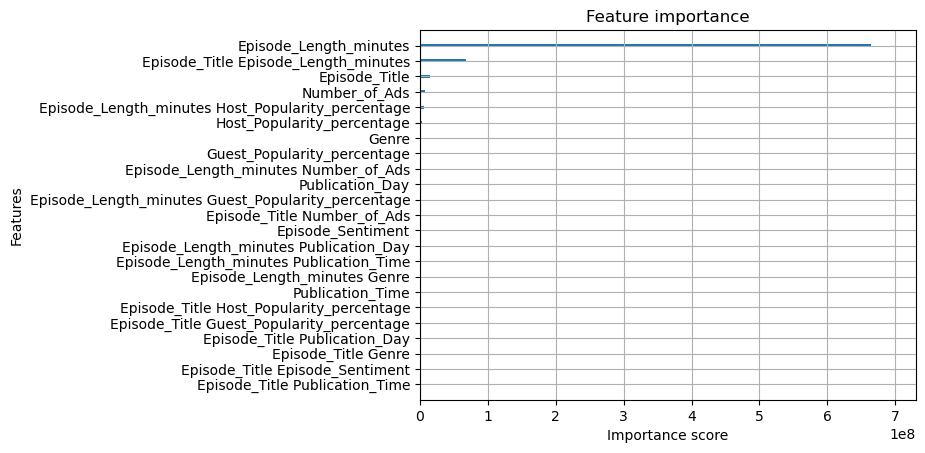

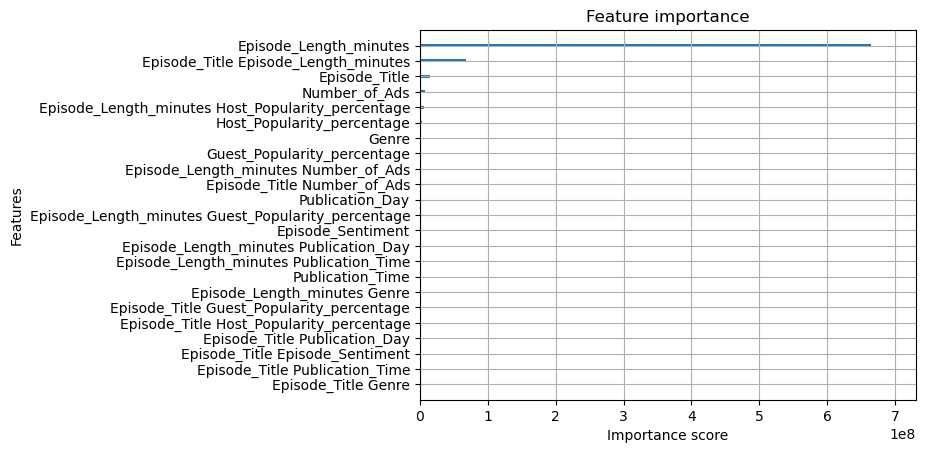

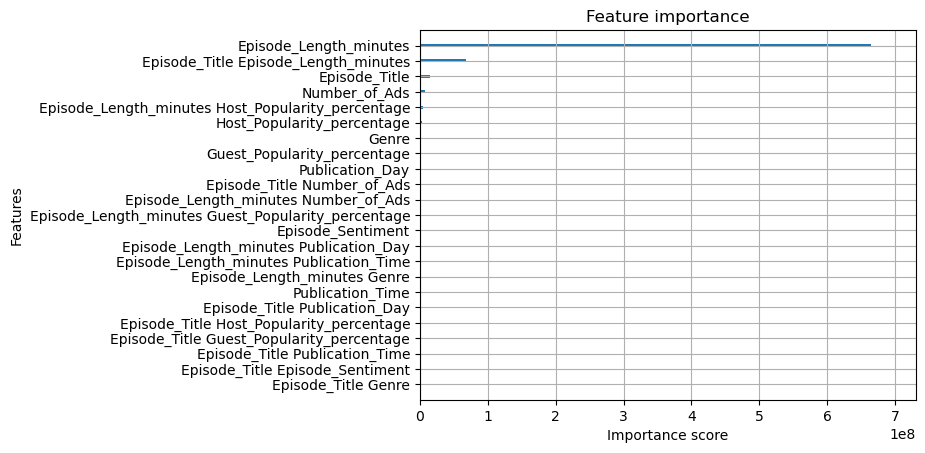

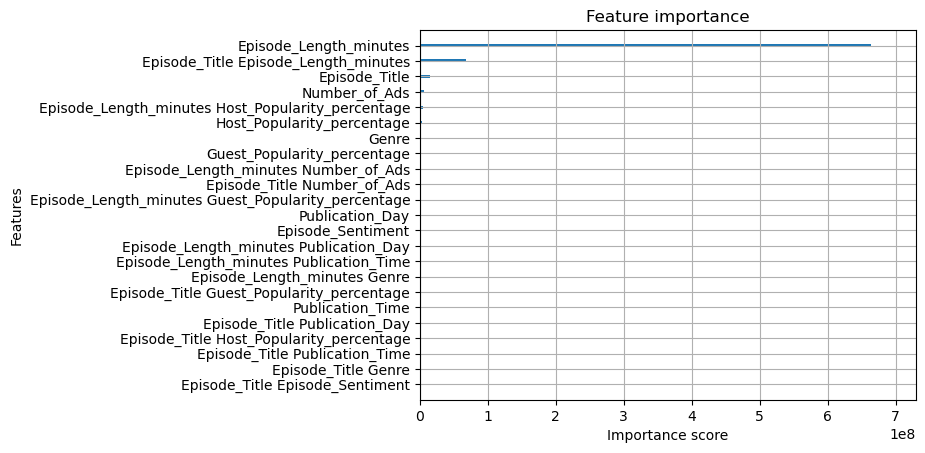

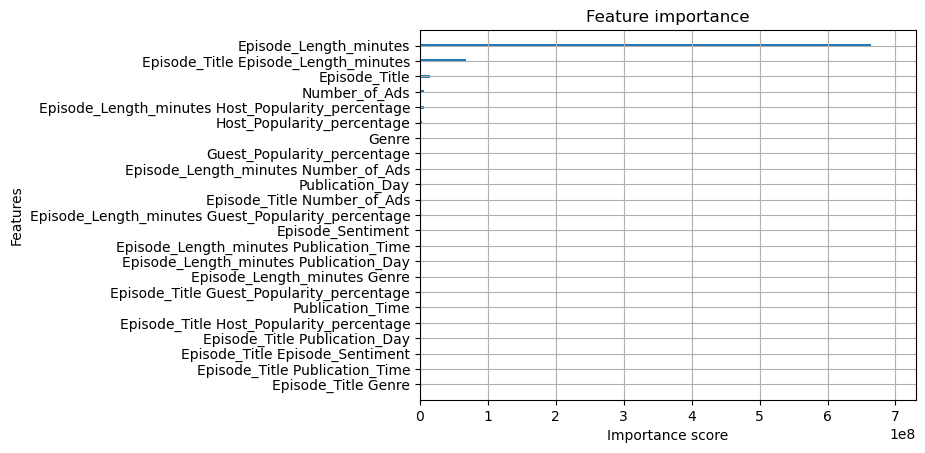

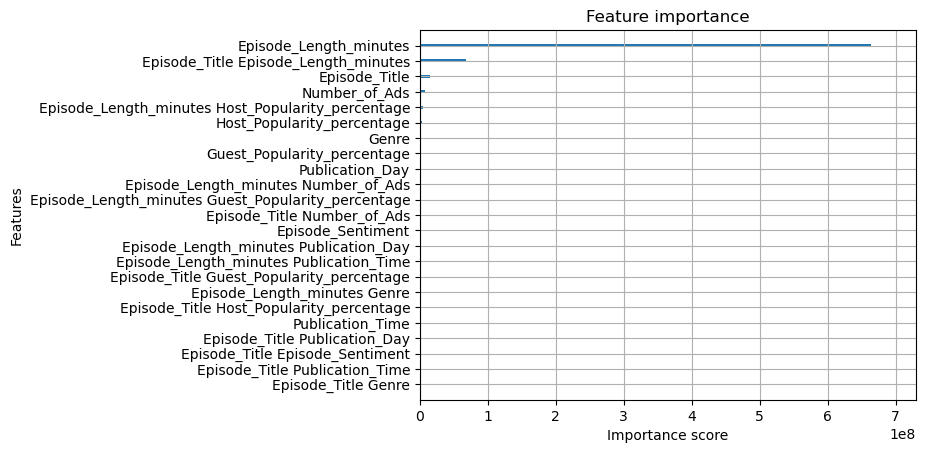

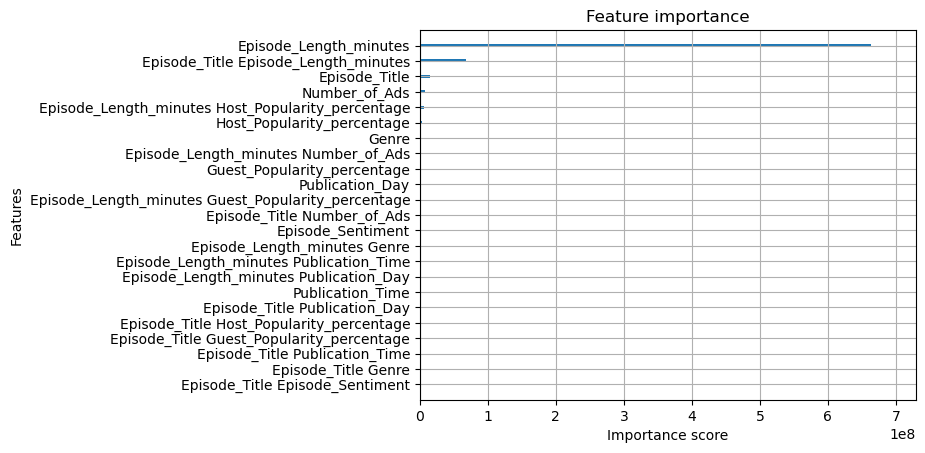

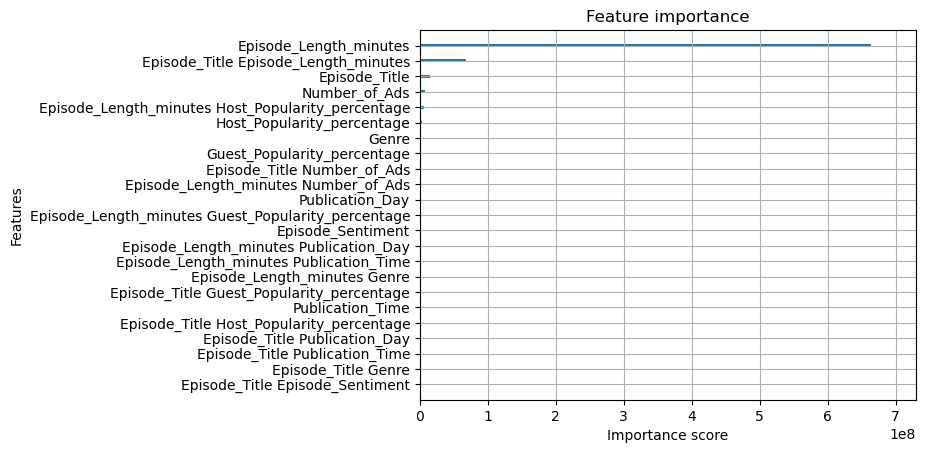

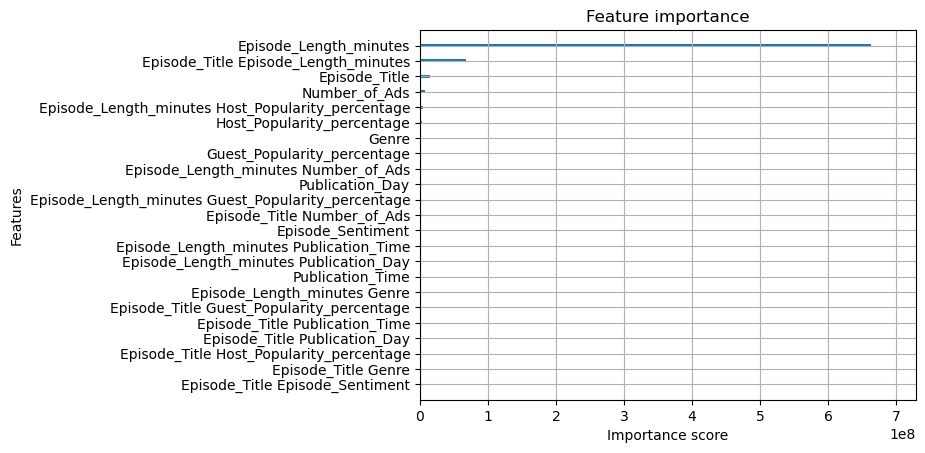

In [ ]:
for train_idx, val_idx in kf.split(x,y):
    x_t, y_t = x_s.iloc[train_idx], y.iloc[train_idx]
    x_v, y_v = x_s.iloc[val_idx], y.iloc[val_idx]
    model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric = 'rmse', enable_categorical = True, device = 'cuda', tree_method="hist")#, min_child_weight=4)
    model.fit(x_t, y_t, eval_set=[(x_v,y_v)])

    xgb.plot_importance(model.get_booster().get_score(importance_type='total_gain'), show_values=True)